In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [70]:
df=df.rename(columns={'race/ethnicity': 'race','parental level of education':'parent education','test preparation course':'preparation_course'})
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['gender', 'race', 'parent_education', 'lunch', 'preparation_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [71]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [72]:
df.isnull().sum()

gender                0
race                  0
parent_education      0
lunch                 0
preparation_course    0
math_score            0
reading_score         0
writing_score         0
dtype: int64

In [73]:
df['percentage'] = round((df['math_score'] + df['reading_score'] + df['writing_score']) / 3, 2)
df.head()

,gender,race,parent_education,lunch,preparation_course,math_score,reading_score,writing_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


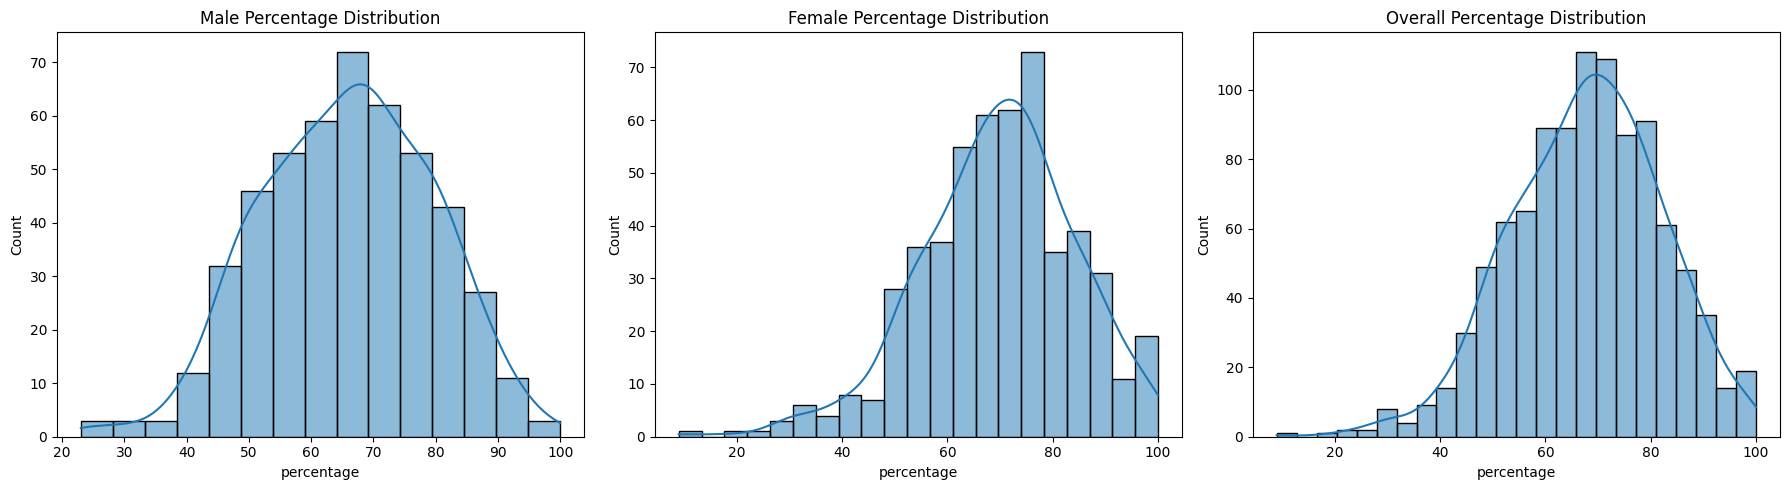

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df[df['gender'] == 'male']['percentage'], kde=True, ax=axes[0])
axes[0].set_title('Male Percentage Distribution')
sns.histplot(df[df['gender'] == 'female']['percentage'], kde=True, ax=axes[1])
axes[1].set_title('Female Percentage Distribution')
sns.histplot(df['percentage'], kde=True, ax=axes[2])
axes[2].set_title('Overall Percentage Distribution')
std_percentage = np.std(df['percentage'])
# print("Standard Deviation of Percentage:", std_percentage)
plt.tight_layout()
plt.show()

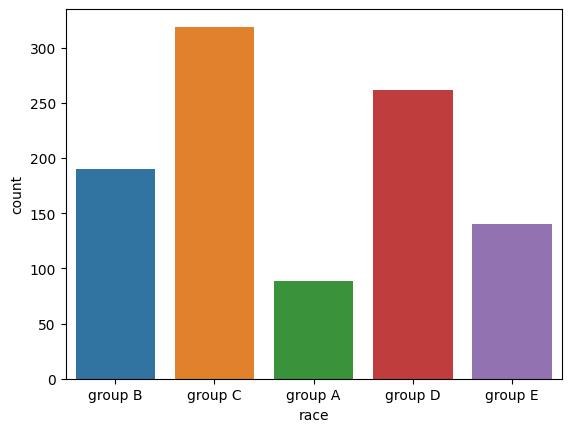

In [75]:
sns.countplot(x='race', data=df)
plt.show()

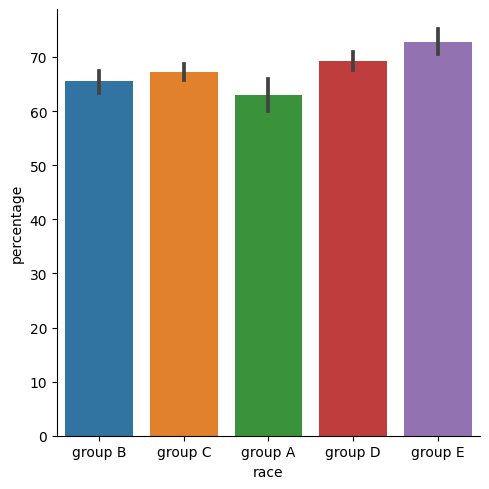

In [76]:
sns.catplot(x='race', y='percentage', kind='bar', data=df)
plt.show()

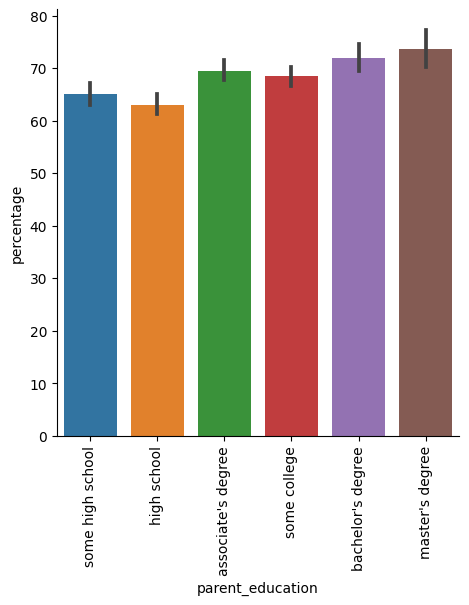

In [77]:
parent_education = ['some high school', 'high school', "associate's degree", 'some college', "bachelor's degree", "master's degree"]
sns.catplot(x='parent_education', y='percentage', kind='bar', order=parent_education, data=df)
plt.xticks(rotation=90)
plt.show()

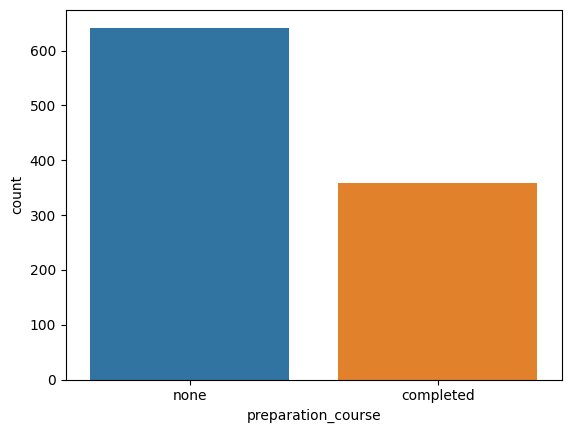

In [83]:
sns.countplot(x='preparation_course', data=df)
plt.show()

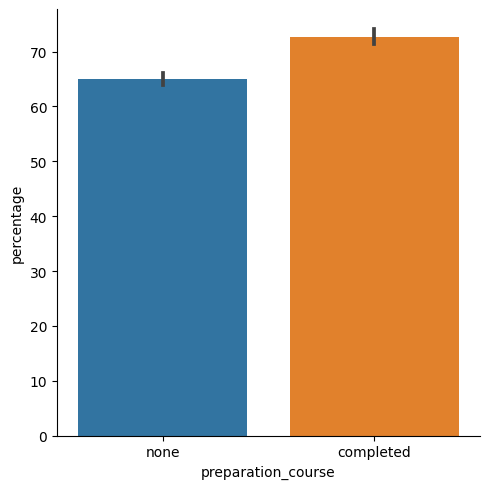

In [85]:
sns.catplot(x='preparation_course', y='percentage', kind='bar', data=df)
plt.show()